# Dataset de ataques cardíacos predicción de parada

In [444]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [445]:
import pandas as pd


df=pd.read_csv(path+'heart.csv')

## Análisis de datos

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [447]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Primer HeatMap preDrop

<Axes: >

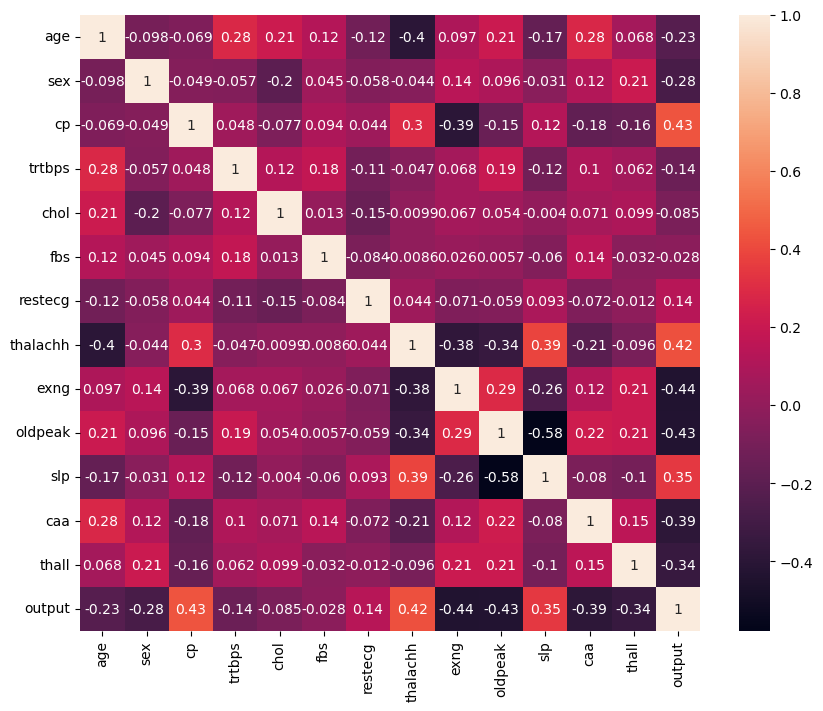

In [448]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [449]:
df.drop(['fbs','chol'],inplace=True,axis=1)

### Segundo HeatMap postDrop

<Axes: >

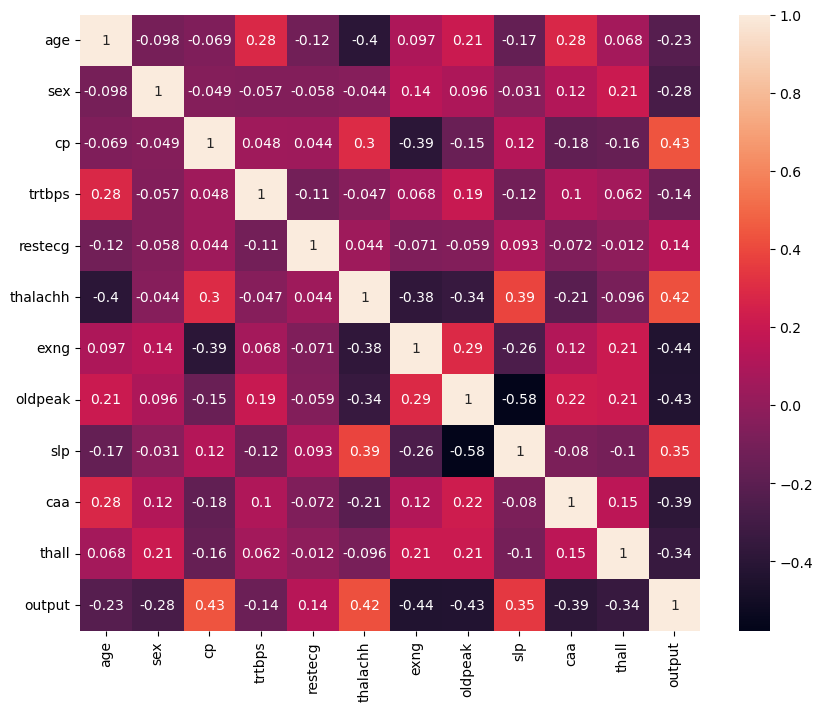

In [450]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Comparación ataques mujeres vs hombres

TypeError: 'numpy.int64' object is not iterable

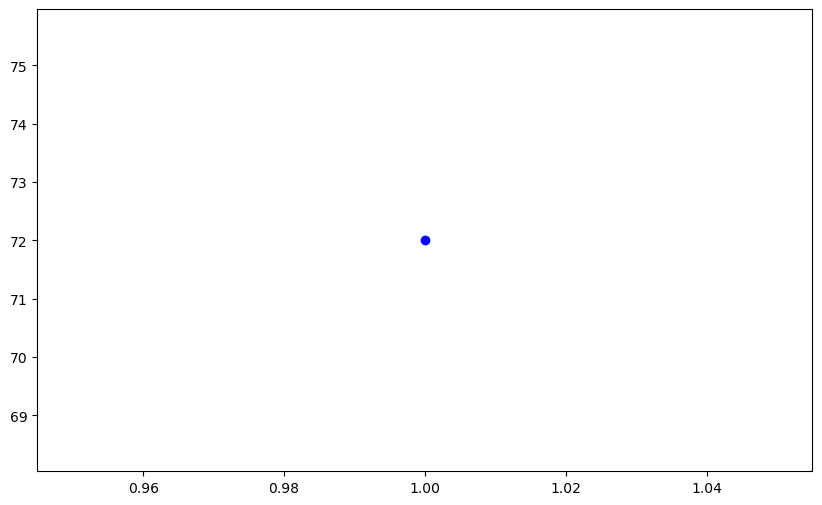

In [470]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'sex' y 'output'
# Paso 1: Agrupación y conteo
dfG = df.groupby('sex')['output'].value_counts().reset_index(name='count')

# Paso 2: Creación del gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
colors = {0: 'blue', 1: 'pink'}  # Colores para cada género

for index, row in dfG.iterrows():
    plt.scatter(row['output'], row['count'], color=colors[row['sex']], label=row['sex'])
    plt.plot([min(row['output']), max(row['output'])], [min(row['count']), min(row['count'])], color='red')

# Dibuja una línea que llegue a todo a la izquierda y luego hasta abajo

plt.xlabel('Output')  # Etiqueta del eje x
plt.ylabel('Count')  # Etiqueta del eje y
plt.title('Count of Output by Gender')  # Título del gráfico
plt.legend()  # Leyenda para los géneros
plt.show()  # Muestra el gráfico


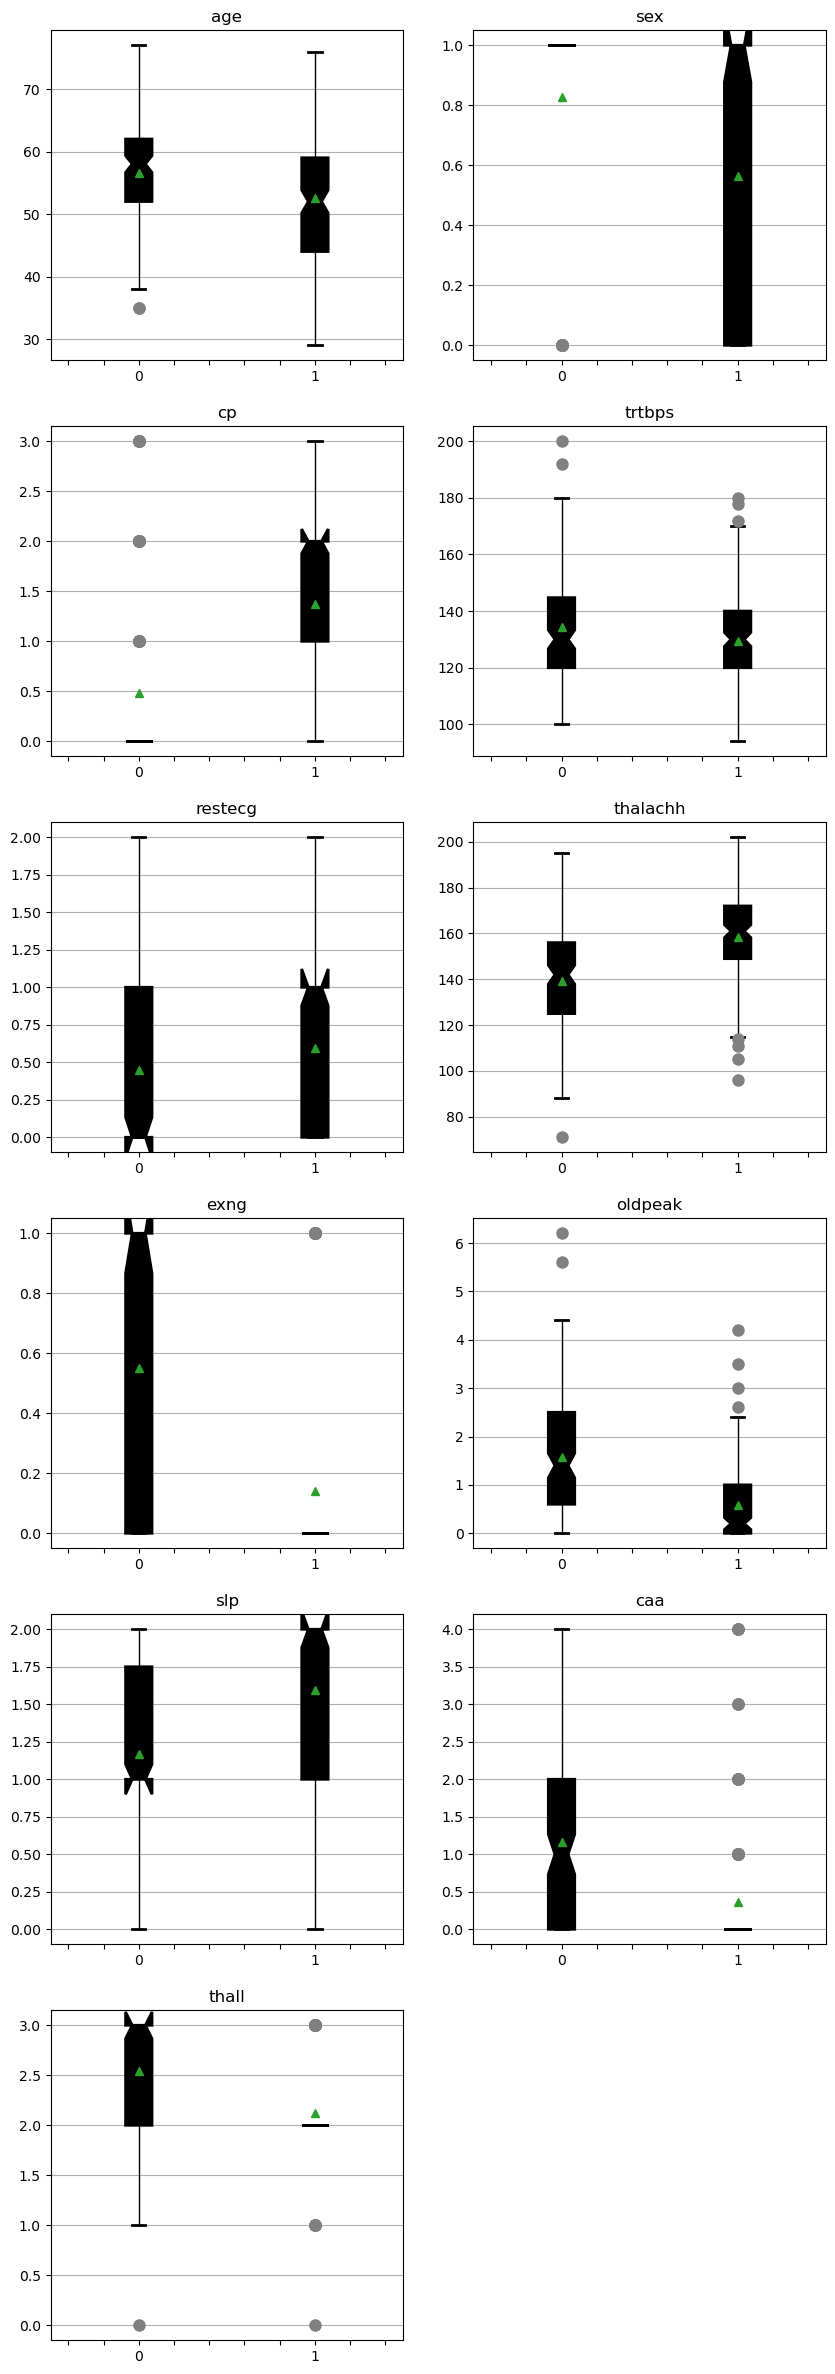

In [452]:
from Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(df.columns,df,by="output")

In [453]:
import numpy as np


def remove_outliers(columns,df):
    df2=df.dropna(subset=columns)
    for j in columns:
        q1 = df2[j].quantile(0.1)
        q3 = df2[j].quantile(0.9)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df2[j])
        for i in df[j]:
            if i > Upper_tail or i < Lower_tail:
                df[j] = df[j].replace(i, med)
    return df
df = remove_outliers(['oldpeak','trtbps'],df)

## Limpieza de datos

### División de Train y Test

In [454]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.20, random_state=42)

In [455]:
y_train = x_train["output"].copy()
x_train = x_train.drop(["output"],axis=1)

y_test = x_test["output"].copy()
x_test = x_test.drop(["output"],axis=1)

### Estandarización de los valores

In [456]:
from sklearn.discriminant_analysis import StandardScaler


x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

## Análisis de modelos

# Recorrido de modelos

In [457]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = {
    "SGDClassifier":SGDClassifier(),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

In [458]:

from sklearn.metrics import precision_score, recall_score


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    print(f"{name} Recall: {recall:.2f}")
    precission = precision_score(y_test, y_pred)
    print(f"{name} Recall: {precission:.2f}")

SGDClassifier Recall: 0.88
SGDClassifier Recall: 0.88
Logistic Regression Recall: 0.91
Logistic Regression Recall: 0.88
Decision Tree Recall: 0.81
Decision Tree Recall: 0.84


Random Forest Recall: 0.84
Random Forest Recall: 0.84
SVM Recall: 0.91
SVM Recall: 0.85
KNN Recall: 0.91
KNN Recall: 0.88
Gradient Boosting Recall: 0.84
Gradient Boosting Recall: 0.82
XGBoost Recall: 0.88
XGBoost Recall: 0.82
AdaBoost Recall: 0.81
AdaBoost Recall: 0.87
Naive Bayes Recall: 0.91
Naive Bayes Recall: 0.88
MLP Neural Network Recall: 0.91
MLP Neural Network Recall: 0.85


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hiper-Parámetros del modelo

In [459]:
import optuna
from sklearn.metrics import log_loss, mean_squared_error

def objective(trial):
    # Define los hiperparámetros a optimizar
    params = {
        'tol' : trial.suggest_float('tol' , 1e-6 , 1e-3),
        'C' : trial.suggest_float("C", 1e-2, 1),
        'solver' : trial.suggest_categorical("solver", ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]),
    }

    # Crea y entrena el modelo de Regresión Logística
    model1 = LogisticRegression(**params, random_state = 42,max_iter=2000)
    model1.fit(x_train , y_train)
    y_predlr1 = model1.predict_proba(x_test)[:,1]
    model2 = LogisticRegression(**params, random_state = 43,max_iter=2000)
    model2.fit(x_train , y_train)
    y_predlr2 = model2.predict_proba(x_test)[:,1]
    y_predlr = (y_predlr1 + y_predlr2) / 2
    ll = log_loss(y_test , y_predlr)
    return ll


#study = optuna.create_study(direction="minimize")
#study.optimize(objective, n_trials = 1000)
#print('numbers of the finished trials:' , len(study.trials))
#print('the best params:' , study.best_trial.params)
#print('the best value:' , study.best_value)

## Modelo definitivo

In [460]:
params = {'tol': 0.00017155488785447877, 'C': 0.43409085778878603, 'solver': 'liblinear',"max_iter":2000}
model = LogisticRegression(**params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Curva de precisión

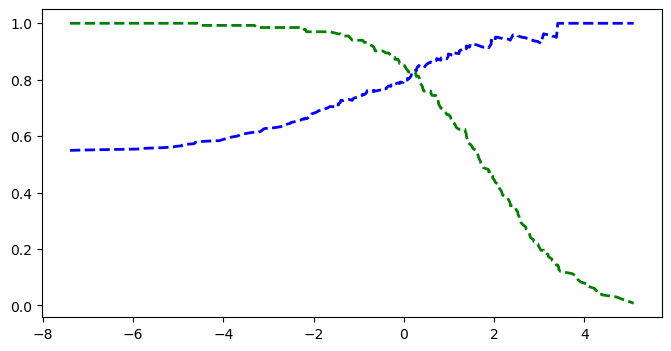

In [461]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(model, x_train, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

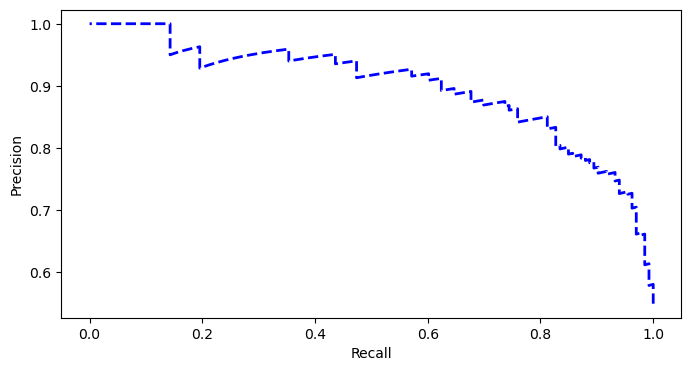

In [462]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

### Resultado

In [463]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score


datos_prueba =  x_test
p = model.predict(datos_prueba)
print("PREDICCIONES: ",p)
y_reales = y_test
print("R2 SCORE:",r2_score(y_test, y_pred))

model_score = cross_val_score(model, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=3)
root_lin_score = np.sqrt(-model_score)
predicciones=model.predict(x_test)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)

print(f"MEDIA DE ERROR AL CUADRADO: {mse} -- ERROR ABSOLUTO: {mae}")
print("MEDIA AL CUADRADO:",root_lin_score.mean())
print("ABSOLUTO AL CUADRADO:",root_lin_score.std())
print("CROSS SCORE",root_lin_score)
print("Reales: ", list(y_reales))


PREDICCIONES:  [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
R2 SCORE: 0.5398706896551724
MEDIA DE ERROR AL CUADRADO: 0.3387537429470791 -- ERROR ABSOLUTO: 0.11475409836065574
MEDIA AL CUADRADO: 0.44395981223240816
ABSOLUTO AL CUADRADO: 0.033155295201990356
CROSS SCORE [0.44444444 0.4843221  0.40311289]
Reales:  [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [464]:
diferentes=0
for index,i in enumerate(p):
    if i != list(y_reales)[index]:
        diferentes+=1
print("FALLA EN:",diferentes)

FALLA EN: 7
